# I. Importing Data and Libraries

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.metrics import accuracy_score, make_scorer
from google.colab import files

In [164]:
train_data = pd.read_csv('https://raw.githubusercontent.com/raj26000/Python-and-Machine-Learning/main/DPhi%20DataSprint%20%2334/Train_data.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/raj26000/Python-and-Machine-Learning/main/DPhi%20DataSprint%20%2334/Test_data.csv')
train_data

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,49.0,8.3,4.5,1.8,3.9,46.6,0.0,0.1,0.0,0.8,1.2,70.2,0.6,0.7,1.3,0.5,0.3,0.3,0.6,1
1097,35.0,5.5,1.5,0.5,1.4,36.0,0.4,1.1,33.3,0.1,0.1,100.0,0.1,0.6,0.7,0.2,0.1,0.0,0.1,1
1098,65.0,13.2,5.0,2.0,5.0,41.3,0.1,0.3,35.0,0.8,1.0,76.9,0.6,1.0,1.6,1.1,0.7,0.3,0.8,0
1099,55.0,14.9,4.1,1.7,4.1,41.7,0.1,0.1,37.5,0.6,0.8,76.1,0.5,1.0,1.5,1.5,0.7,0.2,0.8,0


# II. Exploratory Data Analysis (EDA)



*   **Check Missing Values**



In [165]:
train_data.isnull().sum()

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
Target     0
dtype: int64

In [166]:
test_data.isnull().sum()

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
dtype: int64



*   **Check for Class Imbalance**



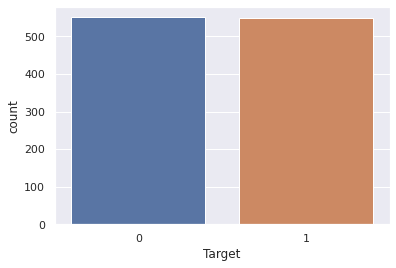

In [167]:
sns.set()
sns.countplot(x = train_data['Target'])



*   **Feature Selection with Kendall-Tau Correlation Coefficient**



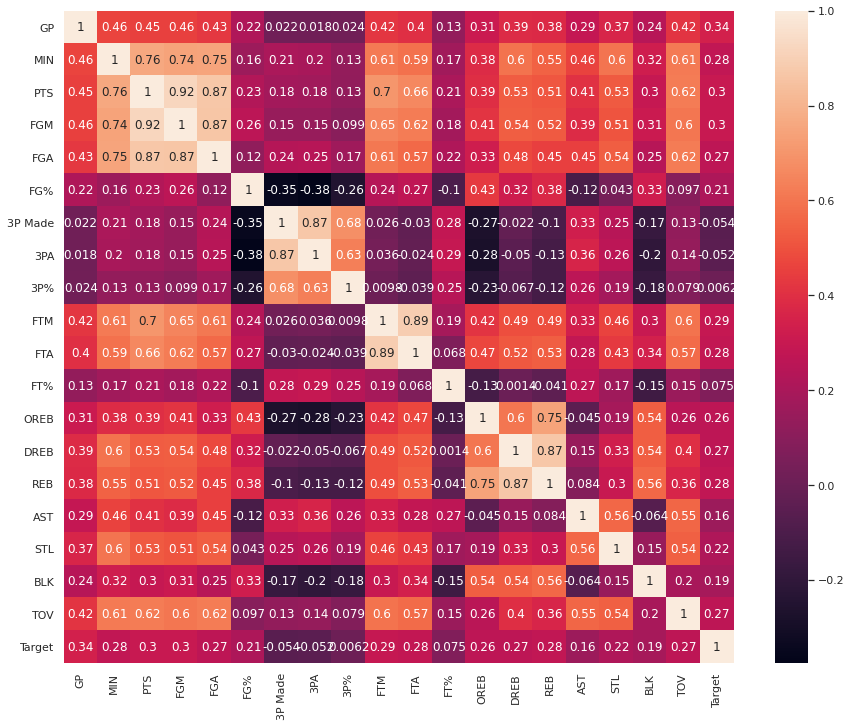

In [168]:
corr = train_data.corr(method='kendall')
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True)

In [169]:
#Drop columns at 0.9 correlation threshold only.
y_train = train_data['Target']
X_train = train_data.drop(['Target', 'PTS'], axis=1)
test_data = test_data.drop(['PTS'], axis=1)



*   **Visualizing Distribution of Numerical Variables**



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8e54c9b750>,
      dtype=object)

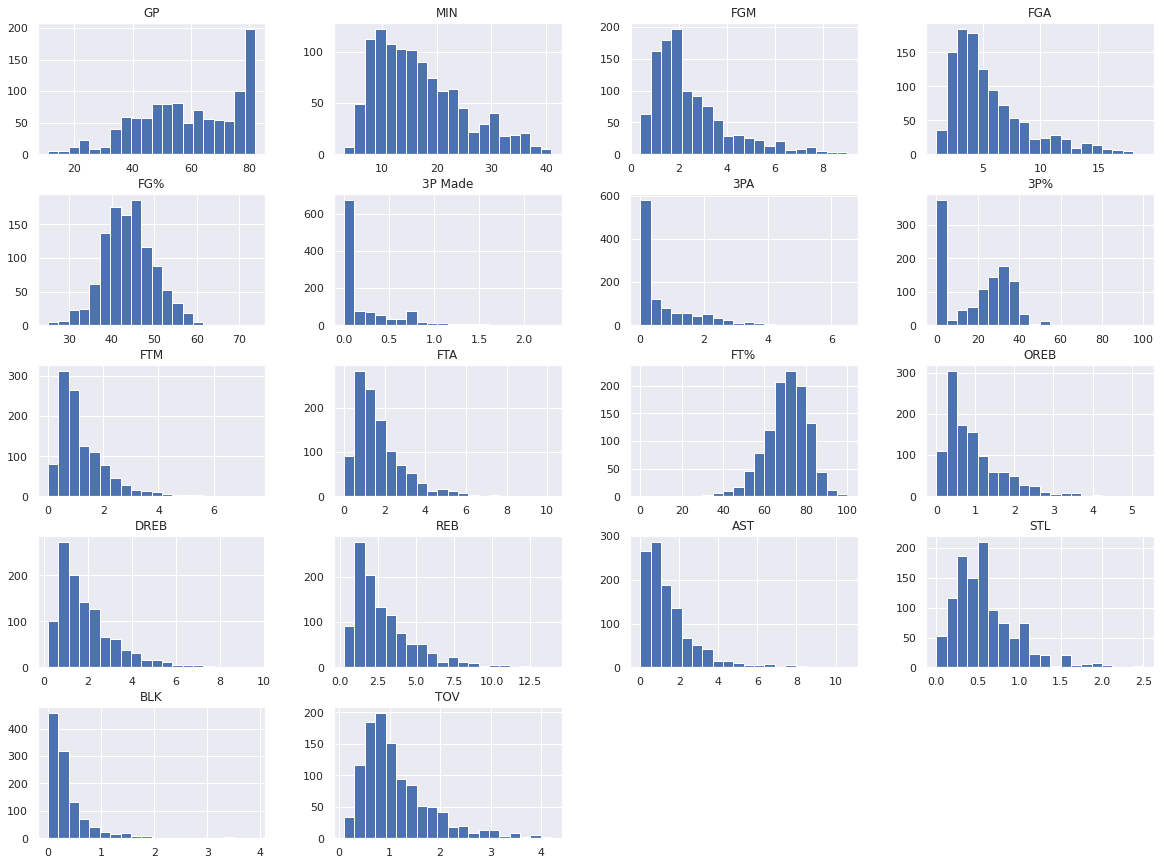

In [170]:
X_train[X_train.columns].hist(layout=(5,4), bins=20, figsize=(20,15))



*   **Feature Standardization**



In [171]:
scaler = StandardScaler()
train_sc = scaler.fit_transform(X_train)
test_sc = scaler.transform(test_data)
train_data = pd.DataFrame(data = train_sc, columns = X_train.columns)
test_data = pd.DataFrame(data = test_sc, columns = test_data.columns)


# III. Model Training with LightGBM

In [173]:
#Similar results were obtained with RandomForestClassifier too. GridSearch tuning not done due to infinite submission limit,
#and to study impact of each feature on score individually.
import xgboost as xgb
best_clf = xgb.XGBClassifier(n_estimators=600, max_depth=5)
best_clf.fit(train_data, y_train)
y_pred = best_clf.predict(test_data)

df = pd.DataFrame()
df['prediction'] = y_pred
df.to_csv('dphi_34.csv', index=False)
files.download('dphi_34.csv')
'''
Final Accuracy Score: RandomForest ~ 0.9856
                      LightGBM ~ 0.987387
                      Catboost ~ 0.9423
                      SVM ~ 0.92
                      LogisticRegression ~ 0.7 
                      KNN  ~ 0.77       '''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'\nFinal Accuracy Score: RandomForest ~ 0.9856\n                      LightGBM ~ 0.987387\n                      Catboost ~ 0.9423\n                      SVM ~ 0.92\n                      LogisticRegression ~ 0.7 \n                      KNN  ~ 0.77       '